In [1]:
import os, sys
import glob
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import wrf
import datetime

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


# import personal modules
# Path to modules
sys.path.append('../../modules')

# # Import my modules
from wrf_funcs_preprocess import select_single_coord_WRF
# from ar_funcs import get_ar_days, duration_stats
# from timeseries import select_months_ds
from utils import find_perpindicular_line, find_parallel_line, find_intersection_two_lines

In [2]:
# Set up paths
server= 'great'
if server == 'great':
    path_to_data = '/home/sbarc/students/nash/data/'
else:
    path_to_data = '/work2/08540/dlnash/frontera/data/'                                      # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
fname_lst = ['35.18N_72.82E', '33.73N_74.82E', '42.85N_71.38E', '28.58N_77.20E']
fname_lst = ['35.18N_72.82E', '33.73N_74.82E'] ## get just these two points
ds_lst1 = []
ds_lst2 = []
ds_lst3 = []
for i, fname in enumerate(fname_lst):
    ## load wvf climatology data
    fname = path_to_data + 'wrf_hasia/d02/wvflux_{0}.nc'.format(fname)
    ds = xr.open_dataset(fname, engine='netcdf4')
    feb1998 = ds.sel(Time='1998-02-14 06')
    feb2010 = ds.sel(Time='2010-02-08 00')
    
    ds_lst1.append(ds) # clim
    ds_lst2.append(feb1998) # feb1998 event
    ds_lst3.append(feb2010) # feb2010 event
    

ds_lst1

[<xarray.Dataset>
 Dimensions:   (Time: 284, bottom_top: 50)
 Coordinates:
     XTIME     (Time) float32 ...
   * Time      (Time) datetime64[ns] 1980-01-25T12:00:00 ... 2015-02-25T12:00:00
     lat       (Time) float32 ...
     lon       float32 ...
 Dimensions without coordinates: bottom_top
 Data variables:
     pressure  (Time, bottom_top) float32 ...
     ua        (Time, bottom_top) float32 ...
     va        (Time, bottom_top) float32 ...
     height    (Time, bottom_top) float32 ...
     QVAPOR    (Time, bottom_top) float32 ...
     HGT       (Time) float32 ...
     q         (Time, bottom_top) float32 ...
     wspd      (Time, bottom_top) float32 ...
     wvf       (Time, bottom_top) float32 ...
 Attributes:
     FieldType:    104
     MemoryOrder:  XYZ
     description:  pressure
     units:        hPa
     stagger:      ,
 <xarray.Dataset>
 Dimensions:   (Time: 411, bottom_top: 50)
 Coordinates:
     XTIME     (Time) float32 ...
   * Time      (Time) datetime64[ns] 1980-02-0

### Plot WVF average over all AR days and Event WVF

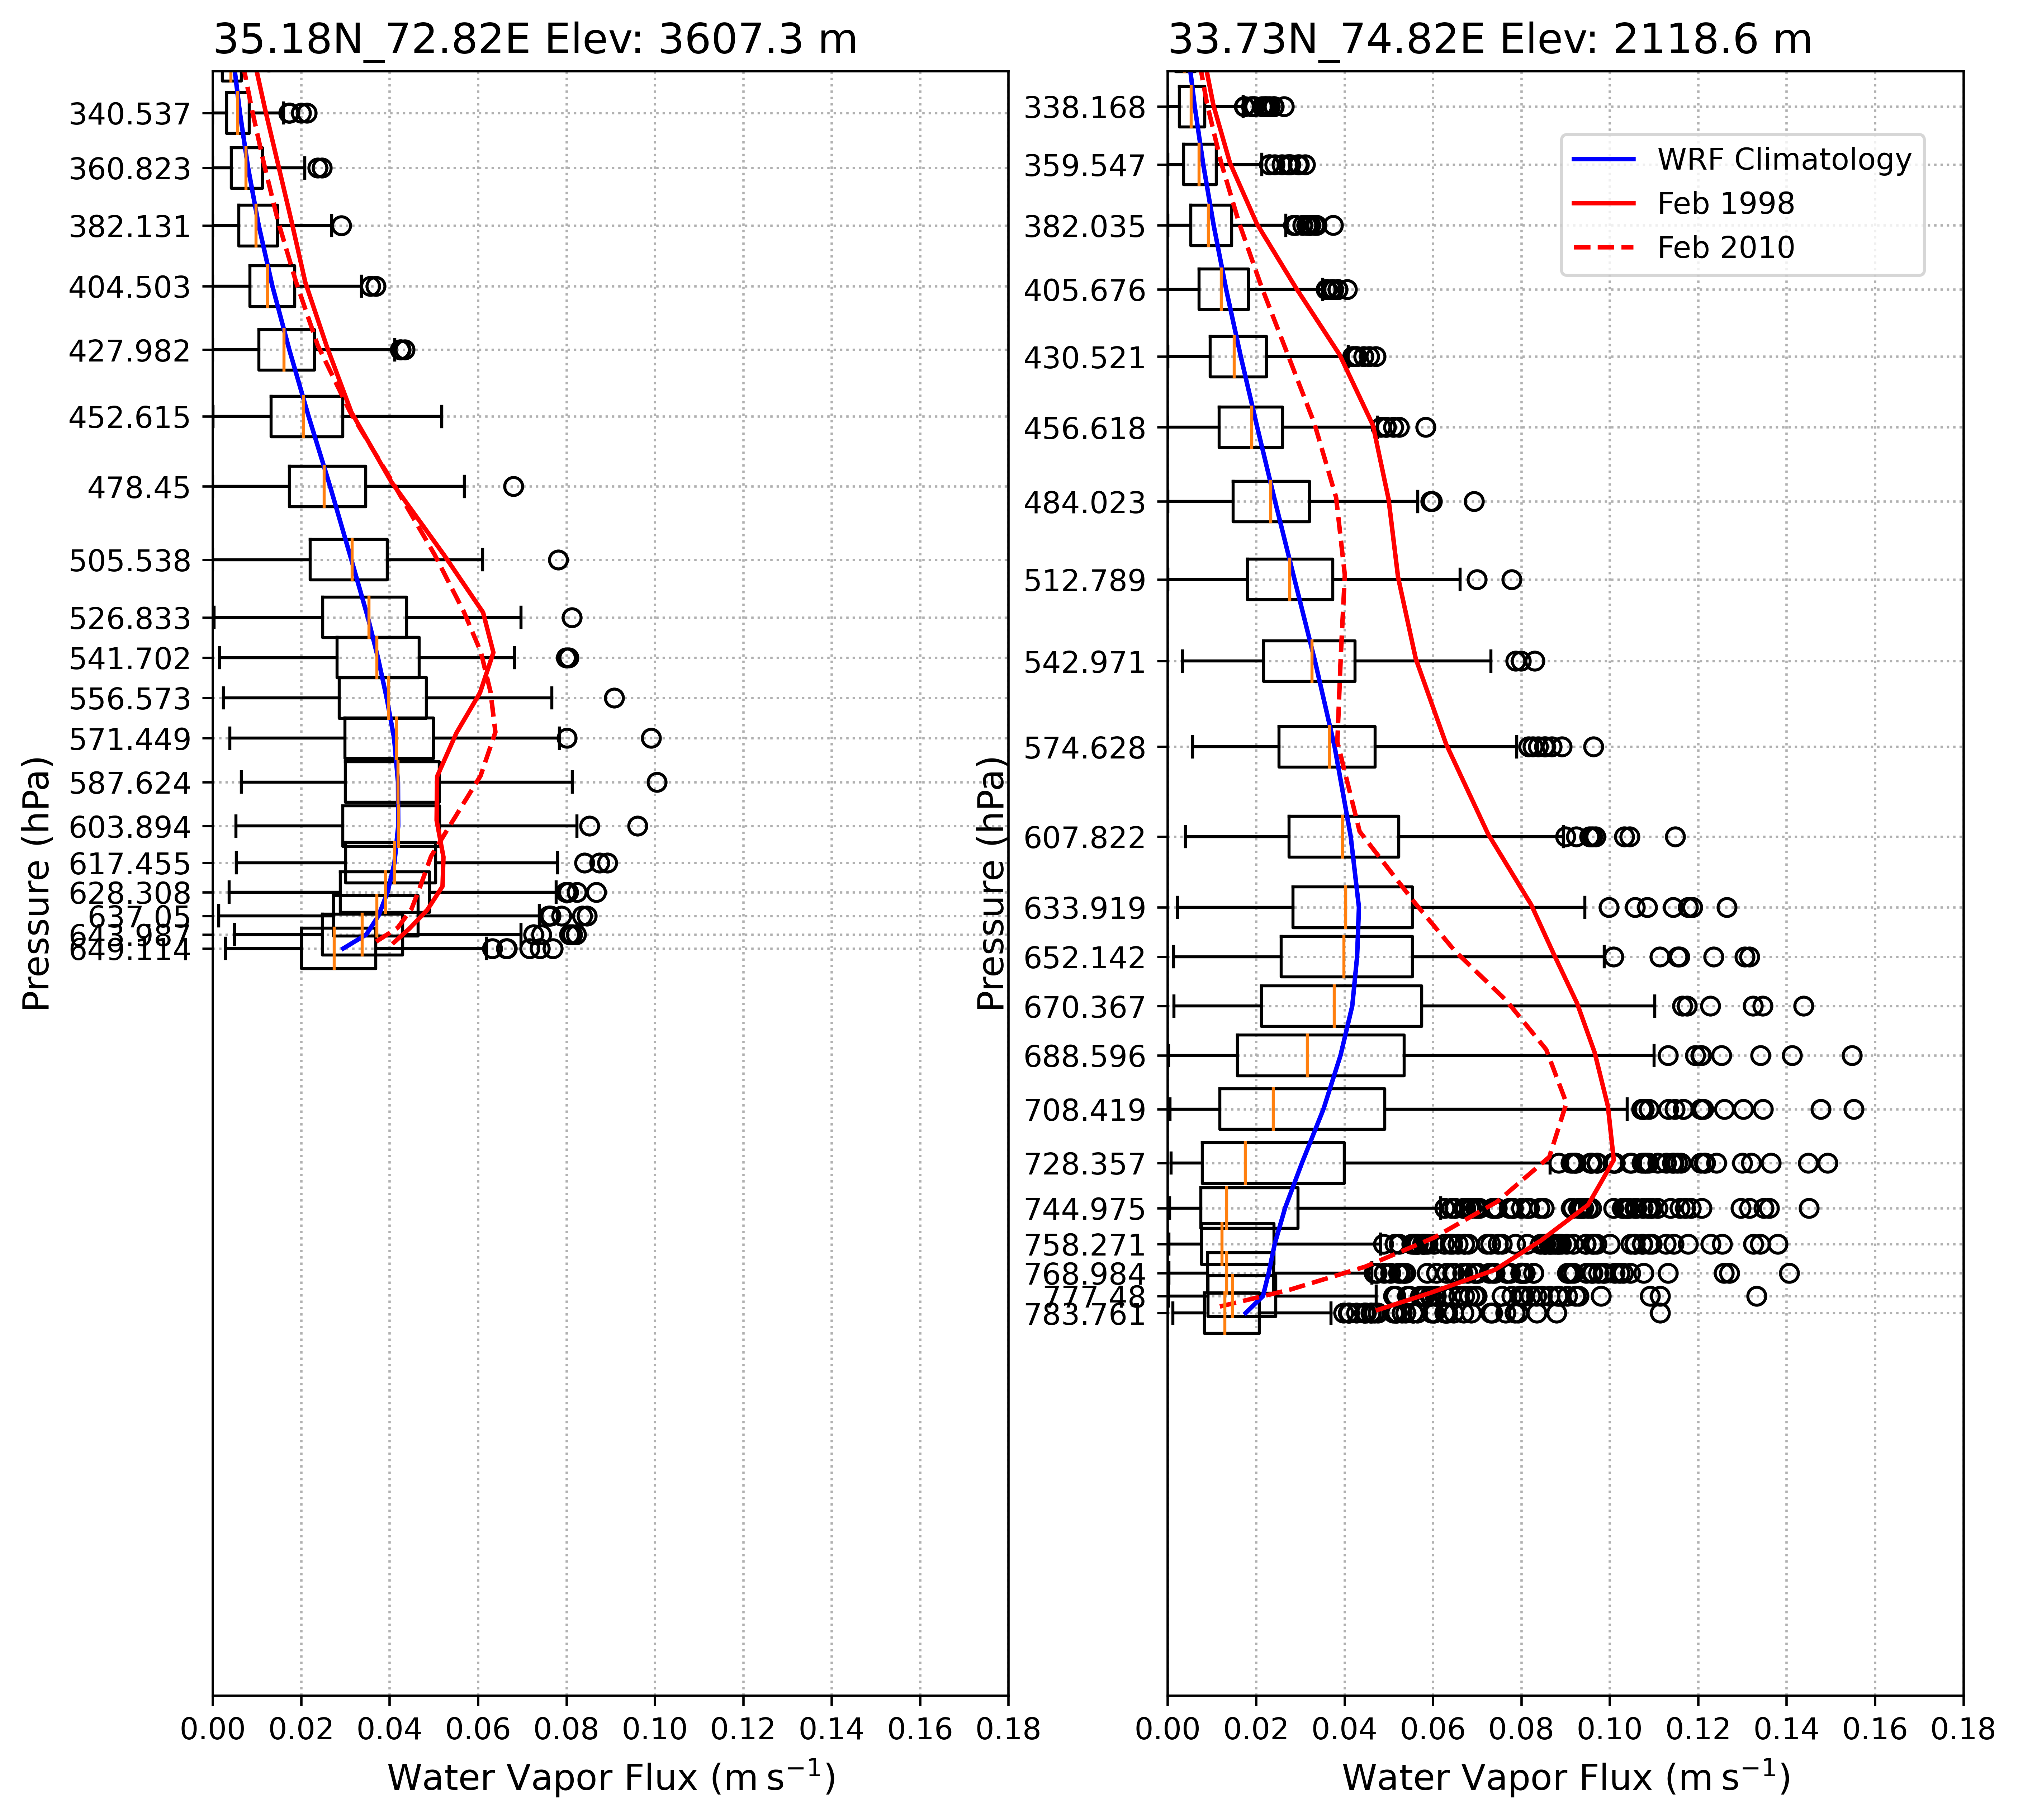

In [4]:
## figsize=(width,height (inches))
fig = plt.figure(figsize=(10.5,10.0))
fig.dpi = 600
fname = '../../figs/wvf_climatology'
fmt = 'png'
nrows = 1
ncols = 2

for i, (ds, ds1, ds2) in enumerate(zip(ds_lst1, ds_lst2, ds_lst3)):
    ax = fig.add_subplot(nrows, ncols, i+1)
    data = ds.wvf.mean('Time').values
    data_jan2002 = ds1.wvf.values
    data_feb2010 = ds2.wvf.values
    
    x_levels = np.arange(0.0, 0.2, 0.02)
    y_levels = y_levels = np.array([900, 800, 800, 700, 600, 500, 400, 300])

    ax.boxplot(ds.wvf, vert=False, widths=15.0, positions=ds.pressure.mean('Time').values)

    clim = ax.plot(data, ds.pressure.mean('Time').values, 'b-', label='WRF Climatology')
    event_jan = ax.plot(data_jan2002, ds1.pressure.values, 'r-', label='Feb 1998')
    event_feb = ax.plot(data_feb2010, ds2.pressure.values, 'r--', label='Feb 2010')
    plt.gca().invert_yaxis()

    ax.set_ylim([925, 325])
    ax.set_xlim([0,0.18])
    ax.set_xticks(x_levels)
    # ax.set_yticks(y_levels)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_ylabel('Pressure (hPa)', fontsize=12)
    ax.set_xlabel('Water Vapor Flux ($\mathrm{m \: s^{-1}}$)', fontsize=12)
    ax.grid(linestyle=':')
    height = ds.HGT.mean('Time').values
    plt.title(fname_lst[i]+ ' Elev: {:.1f} m'.format(height), fontsize=14, loc='left')
    
    if i == 1:
        ## add legend
        lns = clim+event_jan+event_feb
        labs = [l.get_label() for l in lns]
        plt.legend(lns, labs, loc='upper right', bbox_to_anchor=(0.97, 0.97))



## Save figure
plt.savefig(fname, dpi=300, bbox_inches='tight')

plt.show()